# Rendement SCPI

__ATTENTION : Usage à vos risques et périls, résultats non validés et non testés !!!__

[Les performances passées ne préjugent pas des performances futures](https://www.amf-france.org/fr/espace-epargnants/savoir-bien-investir/cadrer-son-projet/les-performances-passees-ne-prejugent-pas-des-performances-futures-pourquoi-cette-mention-0)


L'objectif est de comparer :
- Investissement mensuel en direct
- Investissement mensuel en Assurance Vie
- Investissement à crédit
- Investissement en nue-propriété

SCPI à considérer :
- Transition Europe
- Alderan Comète (pas en France et pas logistique)

SCPI Etrangère pas intérêt en Assurance Vie.
Mais en direct, c'est avantageux:
- Exonération des prélèvement sociaux
- Imposition non pas au TMI, mais à la différence entre le TMI et le taux moyen d'imposition.

## Immobilier direct

### En micro-foncier

Je n'ai pas envie d'en faire maintenant mais avoir un box/parking permettrait de fiscaliser les loyers de SCPI dans du micro-foncier.
Exemple de bien : place de parking sous-terrain
- 7 900 € + 2 215 € de frais de notaire = 10 115 €, se loue 71€/mois charges comprises. Rendement brut de 8,4%.
- Base taxable en micro-foncier : 71 * 12 * 0,7 = 596,4 €/an
- Impôt : 596.4 * 30% = 178,92 €/an
- Gain net : 596,4 - 178,92 = 417,48 €/an
- Rendement net : 417,48 / 10 115 = 4,13%

/!\ : pas de déduction des intérets d'emprunt en micro-foncier, il faut être en régime réel pour pouvoir le faire.

### En régime réel

Permet de déduire les charges, dont les intérêts d'emprunt.
Emprunt : 10 000 € sur 10 ans à 5%



## SCPI

Le régime réel s'applique par défaut.

https://app.louveinvest.com/invest/scpi/coeur-deurope
- Investissement : 10 000 €
- Rendement : 5,93%
- Loyer : 10 000 * 5,93% = 593 €/an,sur 12 mois = 49 €/mois
- Impôt : 593 * (30% + 17.2%) = 593 * 47.2% = 279,56 €/an
- Gain net : 593 - 279,56 = 313,44 €/an
- Rendement net : 313,44 / 10 000 = 3,13%

Si en complément d'un investissement en direct pour avoir le micro-foncier:
- Base taxable en micro-foncier : 49 * 12 * 0,7 = 411,6 €/an
- Impôt : 411,6 * (30%+17.2%) = 411,6 * 47.2% = 194,35 €/an
- Gain net : 49 * 12 - 194,35 = 593 - 194,35 = 398,65 €/an
- Rendement net : 398,65 / 10 000 = 3,99%


### Nue-propriété

Avantages :
- decote de 30% sur la valeur de la pleine propriété
- pas d'impôt sur le revenu

Inconvénients :
- pas de revenu pendant la durée de la nue-propriété



## Revalorisation_annuelle

Durant la décennie écoulée, ces revalorisations, lissées sur l’année, affichaient un taux moyen de 1,25 % (Source : https://placement.meilleurtaux.com/scpi/revalorisation-scpi.html)

La revalorisation d'un bien en direct est de 3%.

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from unittest import TestCase
tc= TestCase()

In [32]:
all_scpi = {
    "corum-origin": {
        "prix_part": 1_135,
        "frais_entree": 11.964,
        "taux_rendement": 6.0,
        "delais_jouissance": 6,
        "part_investie_hors_france": 100-4,
        'frais_sortie': 0,
        'revalorisation_annuelle': 1,
    },
    "corum-eurion": {
        "prix_part": 215,
        "frais_entree": 12,
        "taux_rendement": 4.5,
        "delais_jouissance": 6,
        "part_investie_hors_france": 100-14,
        'frais_sortie': 0,
        'revalorisation_annuelle': 1,
    },
    "coeur-de-regions":{
        "prix_part": 664,
        "frais_entree": 12,
        "taux_rendement": 6.0,
        "delais_jouissance": 5,
        "part_investie_hors_france": 0,
        'frais_sortie': 0,
        'revalorisation_annuelle': 1,
    },
}

In [33]:


class SCPI:
    def __init__(self, prix_part, frais_entree, frais_sortie, revalorisation_annuelle, taux_rendement, taux_moyen_imposition=9, taux_marginal_imposition=30, cashback=3,
                  delais_jouissance=5, prelevement_sociaux=17.2, part_investie_hors_france=0):
        self.prix_part = prix_part
        self.frais_entree = frais_entree / 100
        self.frais_sortie = frais_sortie / 100
        self.revalorisation = revalorisation_annuelle / 100
        self.taux_moyen_imposition = taux_moyen_imposition / 100
        self.taux_marginal_imposition = taux_marginal_imposition / 100
        self.taux_rendement = taux_rendement / 100
        self.cashback = cashback / 100
        self.delais_jouissance = delais_jouissance
        self.prelevement_sociaux = prelevement_sociaux / 100
        self.part_investie_hors_france = part_investie_hors_france / 100
        self.historique_cumul_achats = []
        self.numero_mois = 0
        self.historique_mensuel = []
        self.historique_annuel = []

    def payer_loyer(self):
        if self.numero_mois < self.delais_jouissance:
            loyer = 0
        else:
            loyer = self.historique_cumul_achats[self.numero_mois - self.delais_jouissance] * self.taux_rendement / 12
        return loyer

    def calcul_impots_et_cotisation(self, revenus_fonciers, interet_emprunt=0):
        if revenus_fonciers > 0:
            part_france =  (revenus_fonciers * (1 - self.part_investie_hors_france))
            part_hors_france = revenus_fonciers * self.part_investie_hors_france
            impots_france = (part_france - interet_emprunt) * (self.taux_marginal_imposition + self.prelevement_sociaux)
            # Les intérêts d'emprunts ne sont pas déductibles des impôts hors France
            impots_hors_france = part_hors_france * (self.taux_marginal_imposition - self.taux_moyen_imposition)
            return impots_france + impots_hors_france
        else:
            return 0
    def calculer_rendement(self, nb_annees):
        pass

scpi = SCPI(prix_part=1000, frais_entree=0, frais_sortie=0, revalorisation_annuelle=0, taux_rendement=0, taux_moyen_imposition=9, taux_marginal_imposition=30, cashback=0,
            delais_jouissance=5, prelevement_sociaux=17.2, part_investie_hors_france=100)
tc.assertAlmostEqual(scpi.calcul_impots_et_cotisation(1000), 210)
scpi = SCPI(prix_part=1000, frais_entree=0, frais_sortie=0, revalorisation_annuelle=0, taux_rendement=0, taux_moyen_imposition=9, taux_marginal_imposition=30, cashback=0,
            delais_jouissance=5, prelevement_sociaux=17.2, part_investie_hors_france=0)
tc.assertAlmostEqual(scpi.calcul_impots_et_cotisation(1000), 472)

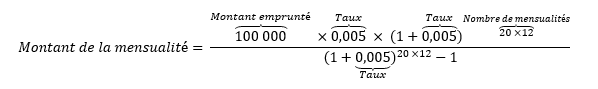

Coût du crédit: 5,929.06 €


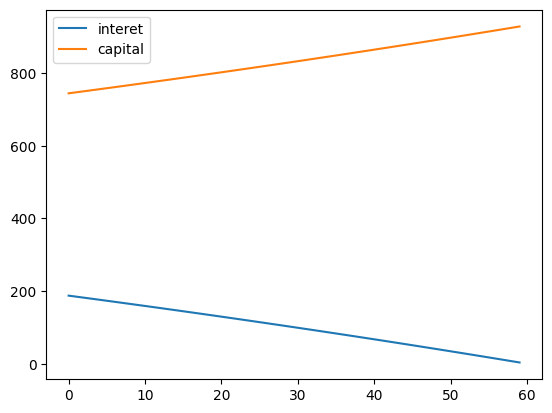

In [34]:
class Credit:
    def __init__(self, capital_emprunte, duree, taux, assurance_taux=0, frais_dossier=0):
        self.capital_emprunte = capital_emprunte
        self.duree = duree
        self.taux = taux / 100
        self.assurance_taux = assurance_taux / 100
        self.frais_dossier = frais_dossier
        self.historique = []
    
    def calculer_mensualite(self):
        """
        Calculer la mensualité du mois month
        
        """
        taux_mensuel = self.taux/12
        mensualite = self.capital_emprunte*taux_mensuel*(1-1/(1-(1+taux_mensuel)**self.duree))

        capital_rembourse = 0 # cumul du capital remboursé
        for mois in range(1, self.duree+1):
            # part du capital remboursé du mois
            capital_mois = (mensualite-taux_mensuel*self.capital_emprunte)*(1+taux_mensuel)**(mois-1)
            # part des intérêts payés dans le mois
            interet_mois = mensualite-capital_mois
            # cumul du capital remboursé
            capital_rembourse += capital_mois
            # capital restant dû
            capital_restant_du = self.capital_emprunte-capital_rembourse
            assurance = self.assurance_taux * capital_restant_du
            mensualite = interet_mois + capital_mois + assurance
            self.historique.append({
                "mois": mois,
                "capital_restant": int(capital_restant_du),
                "interet": interet_mois,
                "capital": capital_mois,
                "assurance": assurance,
                "mensualite": mensualite
            })
        df = pd.DataFrame(self.historique)
        self.cout_total = df["interet"].sum() + self.frais_dossier + df["assurance"].sum()
        self.historique = df
credit = Credit(50_000, 5*12, 4.5, 0, 0)
credit.calculer_mensualite()
df = credit.historique
df[["interet", "capital"]].plot()
print(f"Coût du crédit: {credit.cout_total:,.2f} €")
tc.assertAlmostEqual(credit.cout_total, 5_929.0577245)

In [35]:
credit = Credit(50_000, 10*12, 4.5, 0, 0)
credit.calculer_mensualite()
df = credit.historique
print(f"Coût du crédit: {credit.cout_total:,.2f} €")
df

Coût du crédit: 12,183.05 €


,mois,capital_restant,interet,capital,assurance,mensualite
0,1,49669,187.500000,330.692044,0.0,518.192044
1,2,49337,186.259905,331.932139,0.0,518.192044
2,3,49004,185.015159,333.176884,0.0,518.192044
3,4,48669,183.765746,334.426298,0.0,518.192044
4,5,48334,182.511647,335.680396,0.0,518.192044
...,...,...,...,...,...,...
115,116,2053,9.607744,508.584300,0.0,518.192044
116,117,1542,7.700553,510.491491,0.0,518.192044
117,118,1030,5.786210,512.405834,0.0,518.192044
118,119,516,3.864688,514.327356,0.0,518.192044


In [36]:
class InvestissementDirect(SCPI):
    def calculer_rendement(self, nb_annees, investissement_mensuel, investissement_initial=0):
        """
        Ne prend pas en compte le prix de la part, ni le fait qu'il faut acheter une part entière
        Ni le fait que le prix de la part augmente et qu'il faut donc investir plus pour acheter une part
        """
        total_investi = investissement_initial
        total_loyer_net = 0
        self.numero_mois = 0
        self.historique_mensuel = []
        self.historique_annuel = []
        capital = 0
        for annee in range(1, nb_annees + 1):
            loyer_annuel_brut = 0
            for _ in range(12):
                self.numero_mois += 1
                total_investi += investissement_mensuel
                capital += investissement_mensuel
                self.historique_cumul_achats.append(capital)
                
                loyer_mensuel_brut = self.payer_loyer()
                loyer_annuel_brut += loyer_mensuel_brut
                effort_mensuel = investissement_mensuel - loyer_mensuel_brut
                # print(total_investi, loyer_mensuel_brut, effort_mensuel)
                self.historique_mensuel.append({
                    "mois": self.numero_mois,
                    "loyer_mensuel_brut": loyer_mensuel_brut,
                    "Effort mensuel": effort_mensuel,
                })
            loyer_annuel_net = loyer_annuel_brut - self.calcul_impots_et_cotisation(loyer_annuel_brut)
            # Revalorisation annuelle de la part
            capital *= (1 + self.revalorisation)
            self.historique_cumul_achats = [m * (1 + self.revalorisation) for m in self.historique_cumul_achats] 
            #prix_vente = self.prix_part * (1 - self.frais_sortie)
            #rendement_brut = (prix_vente * (total_investi / prix_achat) - total_investi) / total_investi
            #rendement_net = rendement_brut * (1 - self.impots)
            total_loyer_net += loyer_annuel_net
            gain_net = total_loyer_net + self.historique_cumul_achats[-1] - (total_investi + self.historique_cumul_achats[-1] * self.frais_entree)
            self.historique_annuel.append({
                "Année": annee,
                "Effort mensuel brut": effort_mensuel,
                "Investissement": total_investi,
                "Revalorisation": self.historique_cumul_achats[-1],
                "Loyer Annuel Brut": loyer_annuel_brut,
                "Loyer Annuel Net": loyer_annuel_net,
                "Cumul Loyer Net": total_loyer_net,
                "Frais entree": self.historique_cumul_achats[-1] * self.frais_entree,
                "Gain net": gain_net,
                "Rendement (%)": gain_net / total_investi * 100
            })
        self.historique_annuel = pd.DataFrame(self.historique_annuel)
        self.historique_mensuel = pd.DataFrame(self.historique_mensuel)
        print(f"Motant investi: {total_investi}")
        print(f"Total loyer net: {total_loyer_net}")
        total_frais_sortie = self.historique_cumul_achats[-1] * self.frais_sortie
        self.total_frais_entree = self.historique_cumul_achats[-1] * self.frais_entree
        self.total_frais = self.total_frais_entree + total_frais_sortie
        self.revalorisation_capital = self.historique_cumul_achats[-1] - total_investi
        print(f"Revalorisation capital: {self.revalorisation_capital}")
        self.augmentation_patrimoine = (total_loyer_net + self.revalorisation_capital) - self.total_frais
        print(f"Augmentation patrimoine: {self.augmentation_patrimoine}")
        print(f"Rendement net: {self.augmentation_patrimoine / total_investi*100} %")



class InvestissementAssuranceVie(SCPI):
    def calculer_rendement(self, nb_annees, investissement_mensuel, frais_entree=0, frais_versement=0, frais_gestion=0.5, valeur_de_retrait=90, frais_investissement=4.25):
        data = []
        total_investi = 0
        for annee in range(1, nb_annees + 1):
            for mois in range(12):  # Assume investment is made at the start of each month
                total_investi += investissement_mensuel
                prix_achat = self.prix_part * (1 + self.frais_entree + frais_investissement / 100)
                self.prix_part *= (1 + self.revalorisation / 12)  # Monthly revaluation

            prix_vente = self.prix_part * (1 - self.frais_sortie)
            rendement_brut = (prix_vente * (total_investi / prix_achat) - total_investi) / total_investi
            rendement_net = rendement_brut * (1 - self.impots)
            data.append([annee, rendement_net * 100])
        df = pd.DataFrame(data, columns=['Annee', 'Rendement Net'])
        return df

class InvestissementCredit(SCPI):
    def calculer_rendement(self, nb_annees, montant_investi, taux_emprunt=4.5, assurance_taux=0, frais_dossier=0):
        credit = Credit(montant_investi, nb_annees*12, taux_emprunt, assurance_taux, frais_dossier)
        credit.calculer_mensualite()
        df_credit = credit.historique
        self.historique_mensuel = []
        self.historique_annuel = []
        self.numero_mois = 0
        self.total_frais = montant_investi * (self.frais_entree + self.frais_sortie)
        for annee in range(1, nb_annees + 1):
            loyer_annuel_brut = 0
            interet_emprunt_annuel = 0
            for mois in range(12):
                self.numero_mois += 1
                self.historique_cumul_achats.append(montant_investi)
                loyer_mensuel_brut = self.payer_loyer()
                loyer_annuel_brut += loyer_mensuel_brut
                interet_emprunt = df_credit.loc[self.numero_mois - 1, "interet"]
                mensualite = df_credit.loc[self.numero_mois - 1, "mensualite"]
                self.historique_mensuel.append({
                    "mois": self.numero_mois,
                    "loyer_mensuel_brut": loyer_mensuel_brut,
                    "mensualite": mensualite,
                    "Effort mensuel": mensualite - loyer_mensuel_brut,
                })
                interet_emprunt_annuel += interet_emprunt
            impot_annuel = self.calcul_impots_et_cotisation(revenus_fonciers=loyer_annuel_brut, interet_emprunt=interet_emprunt_annuel)
            loyer_annuel_net = loyer_annuel_brut - impot_annuel
            self.historique_annuel.append({
                    "annee": annee,
                    "loyer_annuel_brut": loyer_annuel_brut,
                    "impot_annuel": impot_annuel,
                    "loyer_annuel_net": loyer_annuel_net,
                })
        df_mois = pd.DataFrame(self.historique_mensuel)
        df_annuel = pd.DataFrame(self.historique_annuel)
        self.historique_mensuel = df_mois
        self.historique_annuel = df_annuel
        # Cout credit
        self.cout_credit = credit.cout_total
        # Cout total
        self.cout_total = self.cout_credit + self.total_frais + df_annuel["impot_annuel"].sum()
        # Gain net
        self.gain_net = df_annuel["loyer_annuel_net"].sum() - self.cout_total
        # TRI : TRI = (flux entrants / flux sortants) ^ [(1 / t) - 1]
        flux_entrants = df_annuel["loyer_annuel_brut"].sum()
        flux_sortants = self.cout_total
        self.tri = (flux_entrants/ flux_sortants) ** (1 / nb_annees) - 1
        return df_mois


class InvestissementNuePropriete(SCPI):
    def calculer_rendement(self, nb_annees, duree_nue_propriete, reduction_prix=0.4):
        data = []
        for annee in range(1, nb_annees + 1):
            if annee <= duree_nue_propriete:
                prix_achat = self.prix_part * (1 - reduction_prix)  # Reduced price during bare ownership period
                rendement_net = 0  # No income during bare ownership period
            else:
                prix_achat = self.prix_part * (1 + self.frais_entree)
                prix_vente = self.prix_part * (1 + self.revalorisation) ** (annee - duree_nue_propriete) * (1 - self.frais_sortie)
                rendement_brut = (prix_vente - prix_achat) / prix_achat
                rendement_net = rendement_brut * (1 - self.impots)
            data.append([annee, rendement_net * 100])
        df = pd.DataFrame(data, columns=['Annee', 'Rendement Net'])
        return df

In [37]:
[1,1]*2

[1, 1, 1, 1]

In [38]:
scpi_credit = InvestissementCredit(**all_scpi["corum-origin"])
df = scpi_credit.calculer_rendement(nb_annees=10, montant_investi=50_000, taux_emprunt=4.5, assurance_taux=0, frais_dossier=0)
print(f"Frais: {scpi_credit.total_frais:,.2f}")
print(f"Coût total (frais + coût crédit): {scpi_credit.cout_total:,.2f}")
print(f"Gain net: {scpi_credit.gain_net:,.2f}")
print(f"TRI: {scpi_credit.tri:.2%}")
scpi_credit.historique_annuel
# scpi_credit.historique_mensuel

Frais: 5,982.00
Coût total (frais + coût crédit): 18,753.45
Gain net: 9,408.15
TRI: 4.37%


,annee,loyer_annuel_brut,impot_annuel,loyer_annuel_net
0,1,1750.0,-637.041563,2387.041563
1,2,3000.0,-273.597352,3273.597352
2,3,3000.0,-181.717592,3181.717592
3,4,3000.0,-85.616892,3085.616892
4,5,3000.0,14.898657,2985.101343
5,6,3000.0,120.031873,2879.968127
6,7,3000.0,229.994890,2770.005110
7,8,3000.0,345.009589,2654.990411
8,9,3000.0,465.308043,2534.691957
9,10,3000.0,591.132987,2408.867013


In [39]:
scpi_credit = InvestissementCredit(**all_scpi["coeur-de-regions"])
df = scpi_credit.calculer_rendement(nb_annees=10, montant_investi=50_000, taux_emprunt=4.5, assurance_taux=0, frais_dossier=0)
print(f"Coût total: {scpi_credit.cout_total:,.2f}")
print(f"Gain net: {scpi_credit.gain_net:,.2f}")
print(f"TRI: {scpi_credit.tri:.2%}")
scpi_credit.historique_annuel
# scpi_credit.historique_mensuel

Coût total: 26,120.65
Gain net: -5,058.25
TRI: 1.05%


,annee,loyer_annuel_brut,impot_annuel,loyer_annuel_net
0,1,2000.0,-78.881563,2078.881563
1,2,3000.0,480.962648,2519.037352
2,3,3000.0,572.842408,2427.157592
3,4,3000.0,668.943108,2331.056892
4,5,3000.0,769.458657,2230.541343
5,6,3000.0,874.591873,2125.408127
6,7,3000.0,984.554890,2015.445110
7,8,3000.0,1099.569589,1900.430411
8,9,3000.0,1219.868043,1780.131957
9,10,3000.0,1345.692987,1654.307013


In [40]:
scpi = InvestissementDirect(**all_scpi["corum-eurion"])
scpi.calculer_rendement(nb_annees=10, investissement_mensuel=500, investissement_initial=3*215)
scpi.historique_annuel

Motant investi: 60645
Total loyer net: 9762.348079273925
Revalorisation capital: 2756.00799918994
Augmentation patrimoine: 4910.235118561072
Rendement net: 8.096685824983217 %


,Année,Effort mensuel brut,Investissement,Revalorisation,Loyer Annuel Brut,Loyer Annuel Net,Cumul Loyer Net,Frais entree,Gain net,Rendement (%)
0,1,486.875000,6645,6060.000000,52.500000,39.549300,39.549300,727.200000,-1272.650700,-19.152005
1,2,464.150000,12645,12180.600000,306.262500,230.713666,270.262967,1461.672000,-1655.809033,-13.094575
2,3,441.197750,18645,18362.406000,581.689500,438.198334,708.461301,2203.488720,-1777.621419,-9.534038
3,4,418.015978,24645,24606.030060,859.870770,647.757848,1356.219149,2952.723607,-1635.474398,-6.636131
4,5,394.602387,30645,30912.090361,1140.833853,859.412958,2215.632107,3709.450843,-1226.728376,-4.003029
5,6,370.954661,36645,37281.211264,1424.606566,1073.184618,3288.816725,4473.745352,-548.717362,-1.497387
6,7,347.070458,42645,43714.023377,1711.217007,1289.093996,4577.910721,5245.682805,401.251293,0.940911
7,8,322.947412,48645,50211.163611,2000.693552,1507.162467,6085.073188,6025.339633,1625.897165,3.342373
8,9,298.583136,54645,56773.275247,2293.064862,1727.411622,7812.484810,6812.793030,3127.967027,5.724160
9,10,273.975218,60645,63401.007999,2588.359886,1949.863269,9762.348079,7608.120960,4910.235119,8.096686
